In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
df = pd.read_csv("Rose.csv")

In [3]:
dates=pd.date_range(start='1980-01-01', freq='MS', periods=len(df))

In [4]:
#data = df.copy()
df.set_index(dates, inplace=True)

In [5]:
df.head()

,YearMonth,Rose
1980-01-01,1980-01,112.0
1980-02-01,1980-02,118.0
1980-03-01,1980-03,129.0
1980-04-01,1980-04,99.0
1980-05-01,1980-05,116.0


In [6]:
df.tail()

,YearMonth,Rose
1995-03-01,1995-03,45.0
1995-04-01,1995-04,52.0
1995-05-01,1995-05,28.0
1995-06-01,1995-06,40.0
1995-07-01,1995-07,62.0


In [7]:
df.head()

,YearMonth,Rose
1980-01-01,1980-01,112.0
1980-02-01,1980-02,118.0
1980-03-01,1980-03,129.0
1980-04-01,1980-04,99.0
1980-05-01,1980-05,116.0


In [8]:
df.drop(labels='YearMonth',inplace=True,axis=1)
df.head()

,Rose
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [10]:
# number of rows and columns
df.shape

(187, 1)

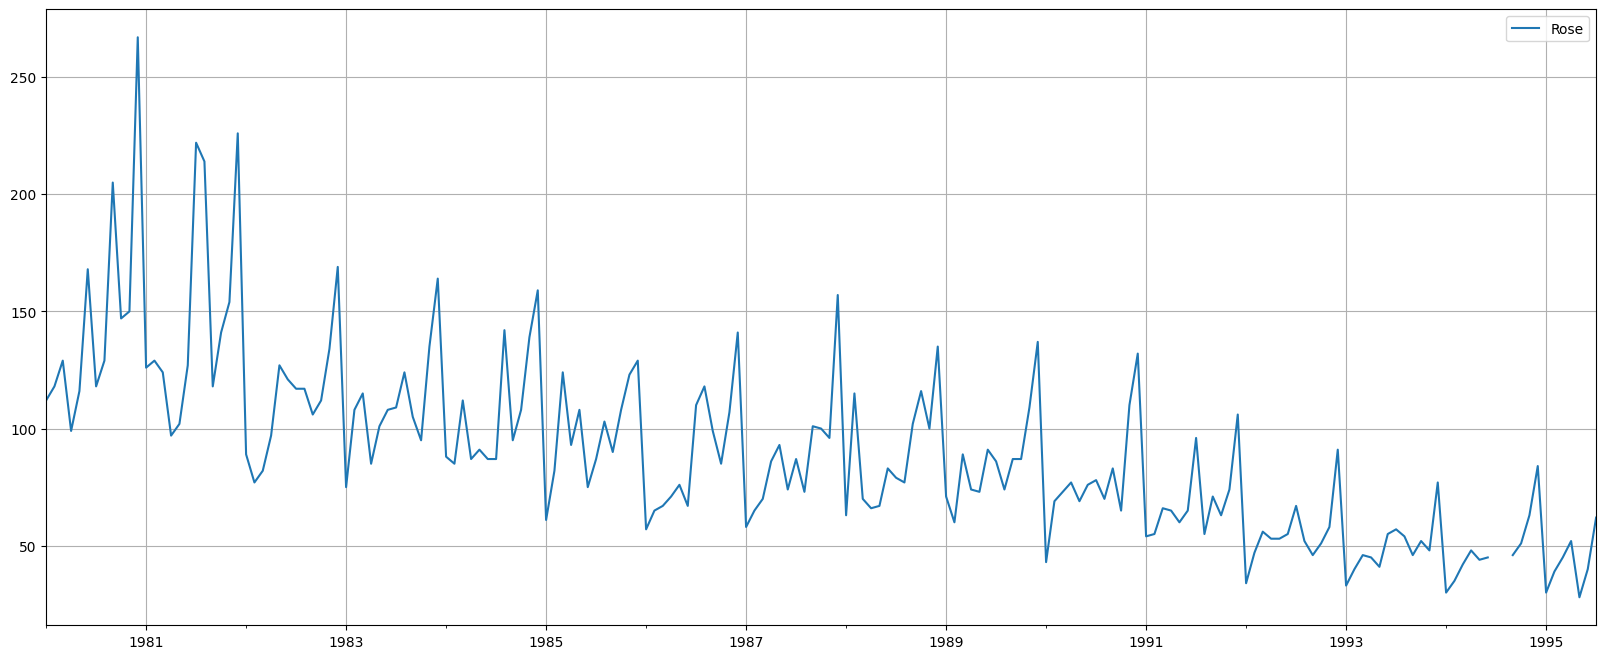

In [11]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [12]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

,Rose,Year,Month
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [13]:
df.columns=['Sales', 'Year', 'Month']
df.head()

,Sales,Year,Month
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [14]:
df.tail()

,Sales,Year,Month
1995-03-01,45.0,1995,3
1995-04-01,52.0,1995,4
1995-05-01,28.0,1995,5
1995-06-01,40.0,1995,6
1995-07-01,62.0,1995,7


In [15]:
# number of rows and columns
df.shape

(187, 3)

In [16]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   185 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [17]:
# statistical summary
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Sales,185.0,90.0,39.0,28.0,63.0,86.0,112.0,267.0
Year,187.0,1987.0,5.0,1980.0,1983.0,1987.0,1991.0,1995.0
Month,187.0,6.0,3.0,1.0,3.0,6.0,9.0,12.0


In [18]:
# isnull
df.isnull().sum()

Sales    2
Year     0
Month    0
dtype: int64

In [19]:
df[df['Sales'].isna()]

,Sales,Year,Month
1994-07-01,NaN,1994,7
1994-08-01,NaN,1994,8


In [20]:
df['Sales_Before_After_Mean']=df['Sales']

In [21]:
np.mean(df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [22]:
df.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])
df.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==8]['1993-08-01':'1995-08-01']['Sales'])

df[df['Sales_Before_After_Mean'].isna()]

,Sales,Year,Month,Sales_Before_After_Mean


In [23]:
df.loc['1994-07-01':'1994-08-01']

,Sales,Year,Month,Sales_Before_After_Mean
1994-07-01,NaN,1994,7,59.5
1994-08-01,NaN,1994,8,54.0


In [24]:
df[df.Month==7]

,Sales,Year,Month,Sales_Before_After_Mean
1980-07-01,118.0,1980,7,118.0
1981-07-01,222.0,1981,7,222.0
1982-07-01,117.0,1982,7,117.0
1983-07-01,109.0,1983,7,109.0
1984-07-01,87.0,1984,7,87.0
1985-07-01,87.0,1985,7,87.0
1986-07-01,110.0,1986,7,110.0
1987-07-01,87.0,1987,7,87.0
1988-07-01,79.0,1988,7,79.0
1989-07-01,86.0,1989,7,86.0


In [25]:
df[df.Month==8]

,Sales,Year,Month,Sales_Before_After_Mean
1980-08-01,129.0,1980,8,129.0
1981-08-01,214.0,1981,8,214.0
1982-08-01,117.0,1982,8,117.0
1983-08-01,124.0,1983,8,124.0
1984-08-01,142.0,1984,8,142.0
1985-08-01,103.0,1985,8,103.0
1986-08-01,118.0,1986,8,118.0
1987-08-01,73.0,1987,8,73.0
1988-08-01,77.0,1988,8,77.0
1989-08-01,74.0,1989,8,74.0


In [26]:
df.drop(['Sales'],inplace=True,axis=1)

df.head()

,Year,Month,Sales_Before_After_Mean
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [27]:
# fill missing values in sales with the mean
df.columns=['Year', 'Month', 'Sales']
df.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

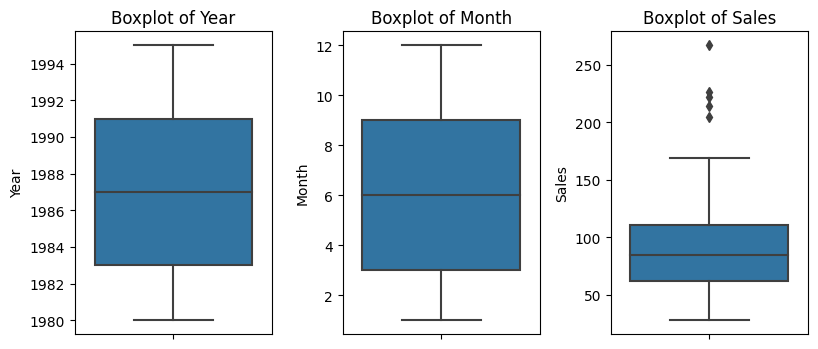

In [28]:
# boxplot

dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: >

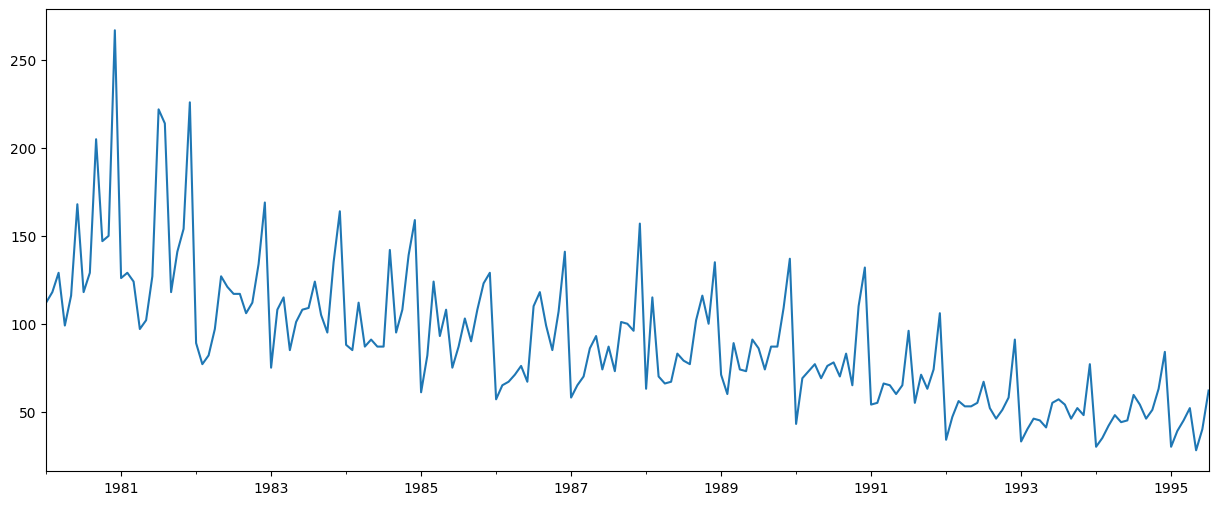

In [29]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

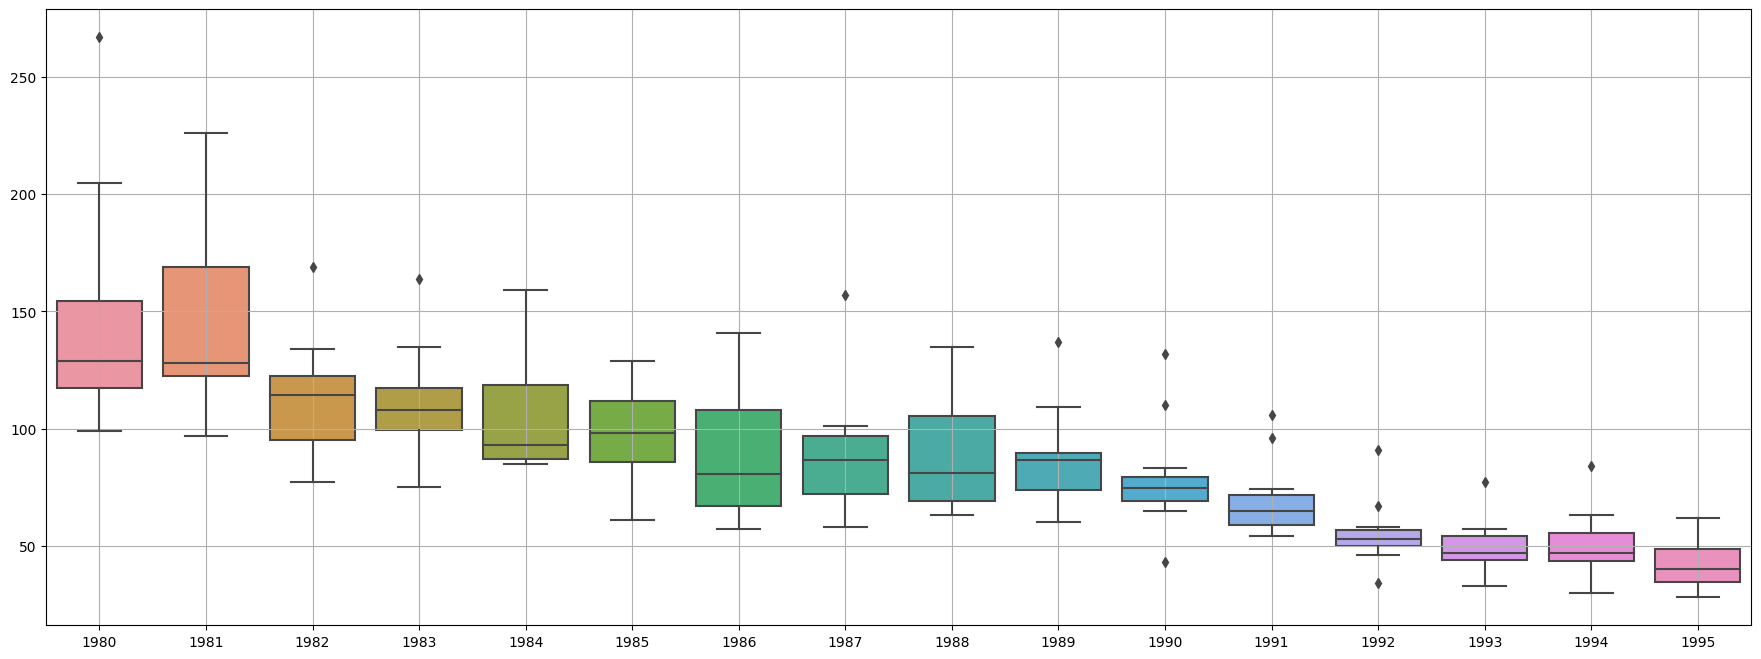

In [30]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,2],ax=ax)
plt.grid();

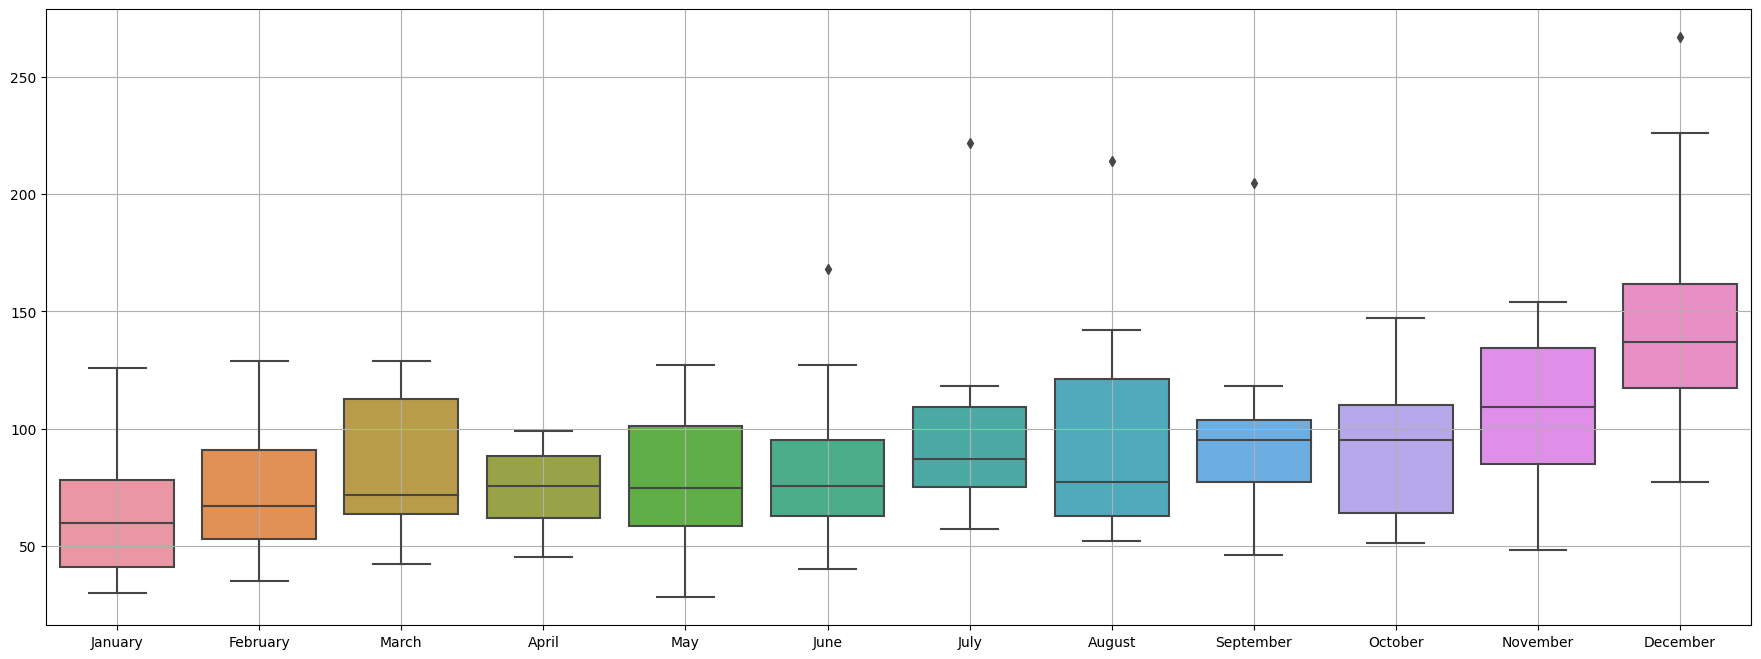

In [31]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,2],ax=ax)
plt.grid();

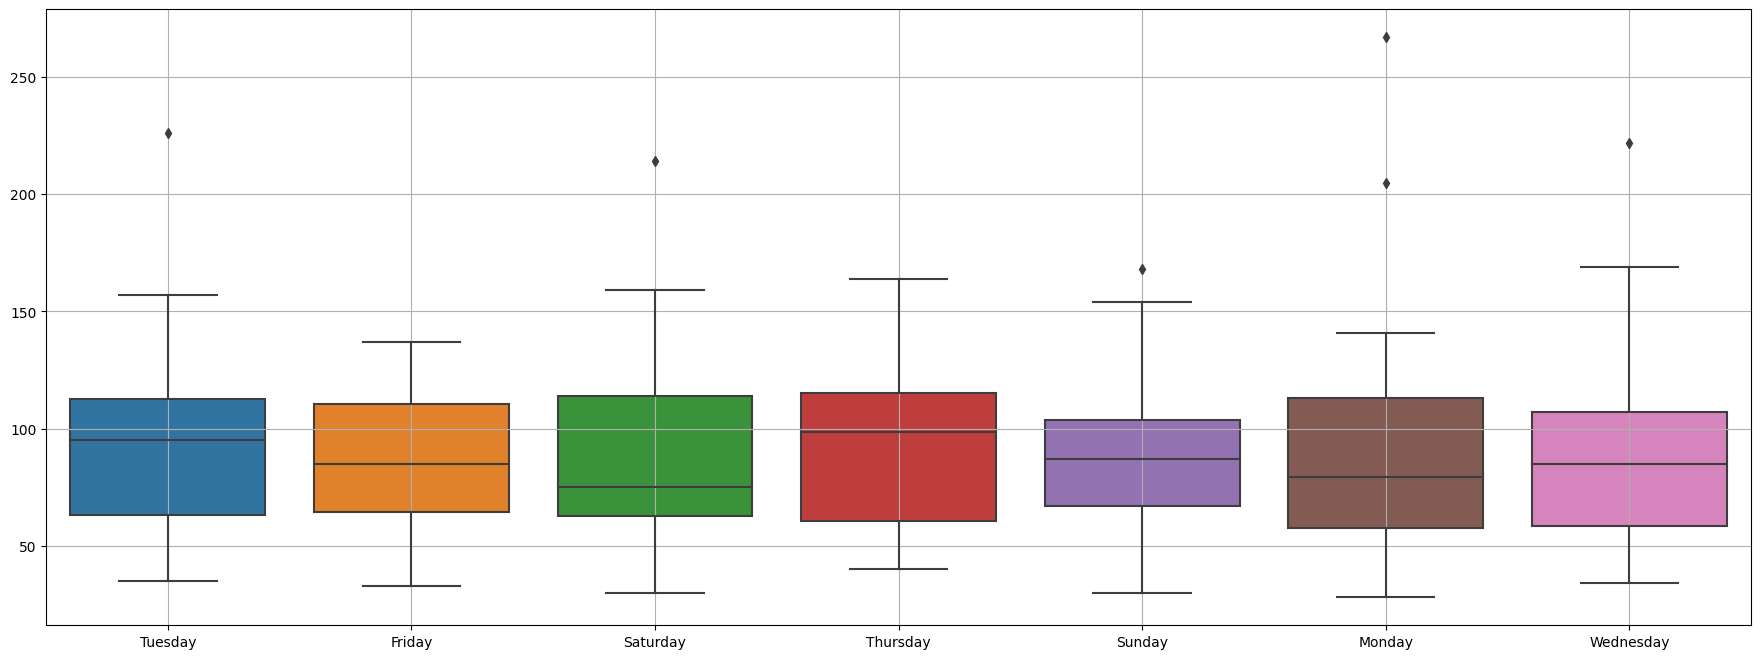

In [32]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,2],ax=ax)
plt.grid();

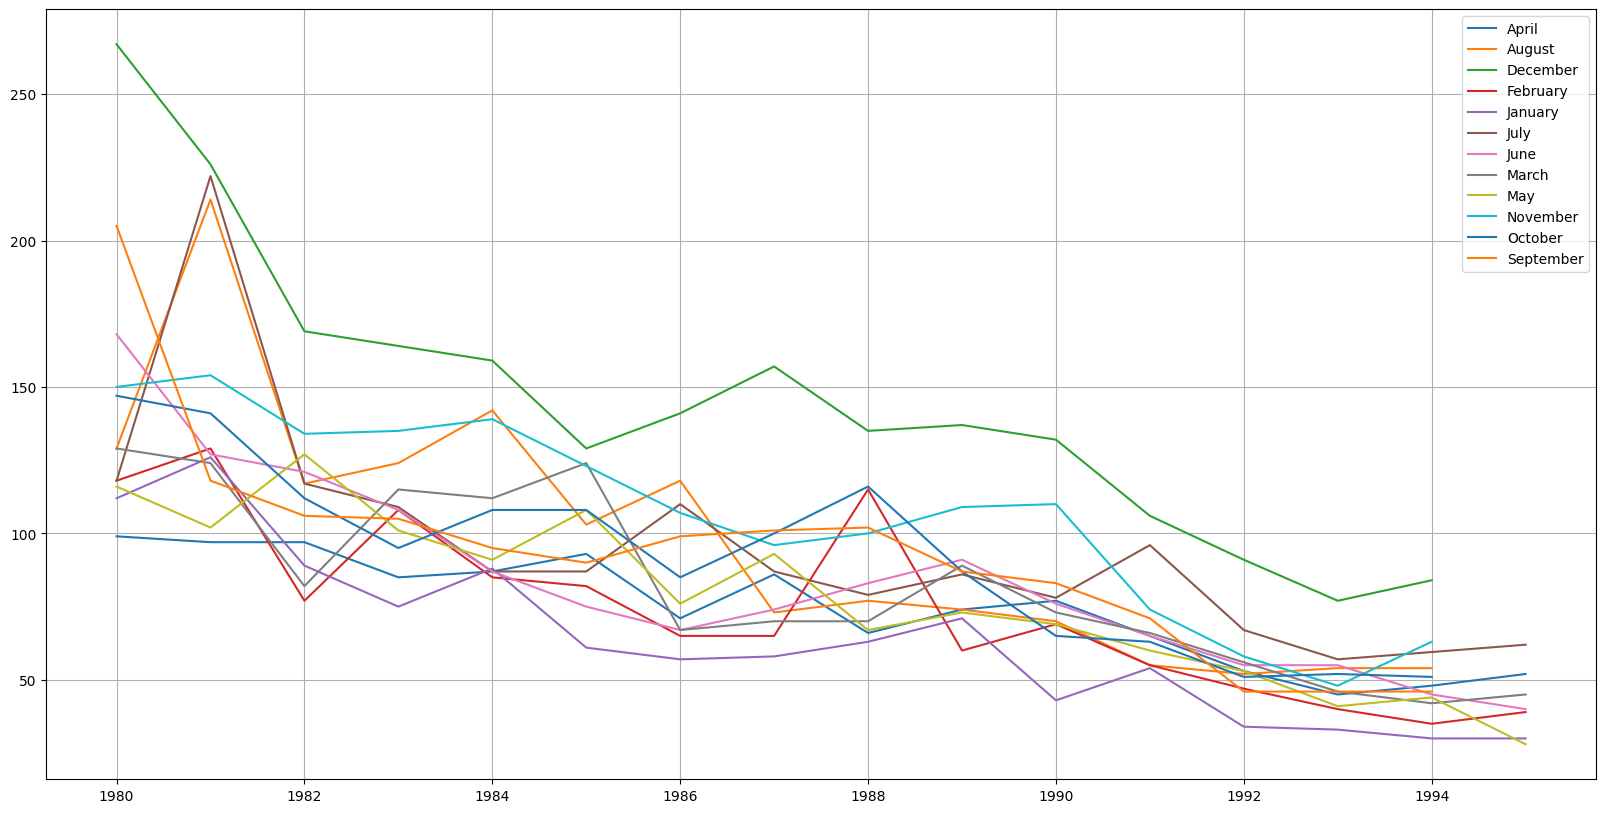

In [33]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

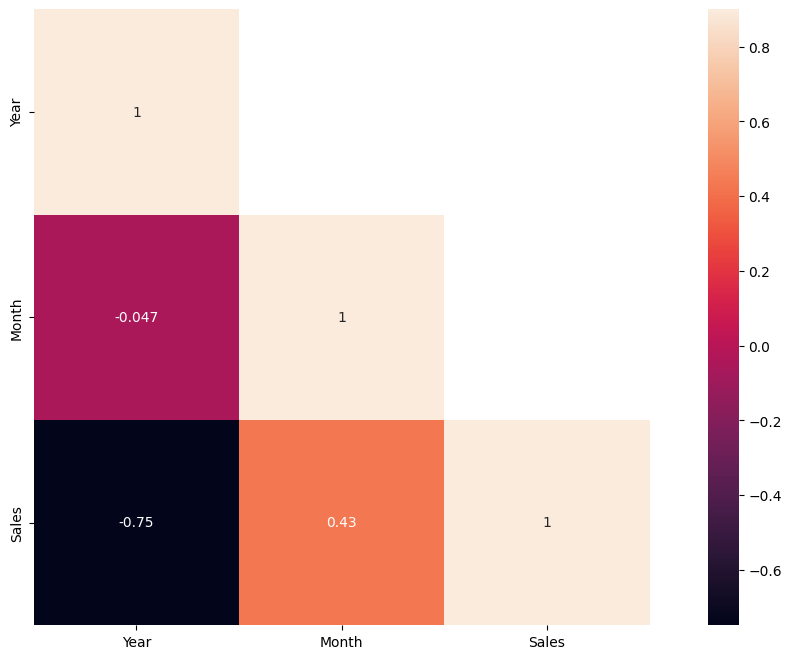

In [34]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

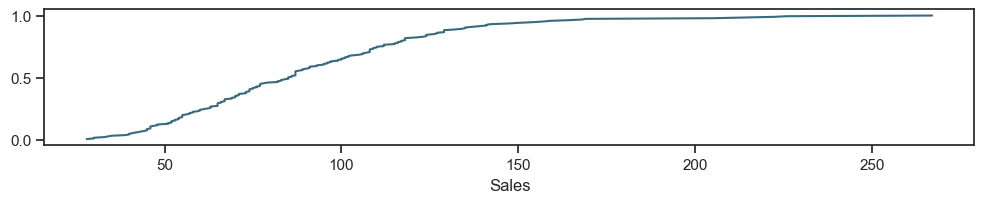

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

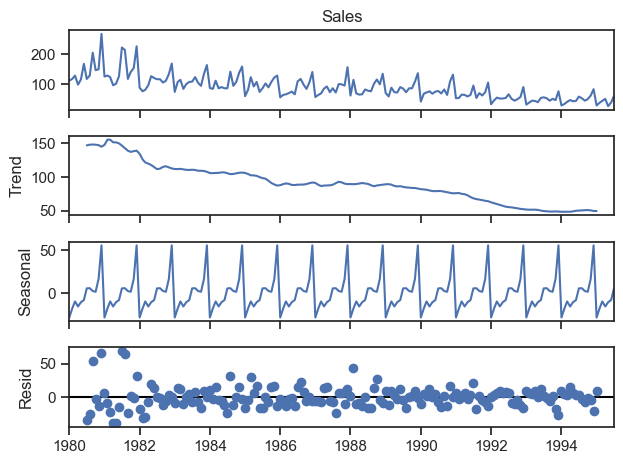

In [36]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [37]:

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.284772
Freq: MS

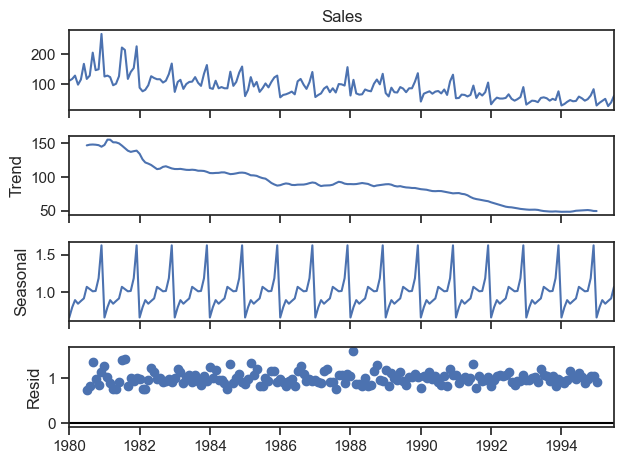

In [38]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [39]:

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Freq: MS, Name: trend, dtype: float64 

Seasonality 
 1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Freq: MS, Name: seasonal, dtype: float64 

Residual 
 1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Freq: MS, Name: resid, dtype: fl

In [40]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [41]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-05-01  1995      5   28.0
1995-06-01  1995      6   40.0
1995-07-01  1995      7   62.0 



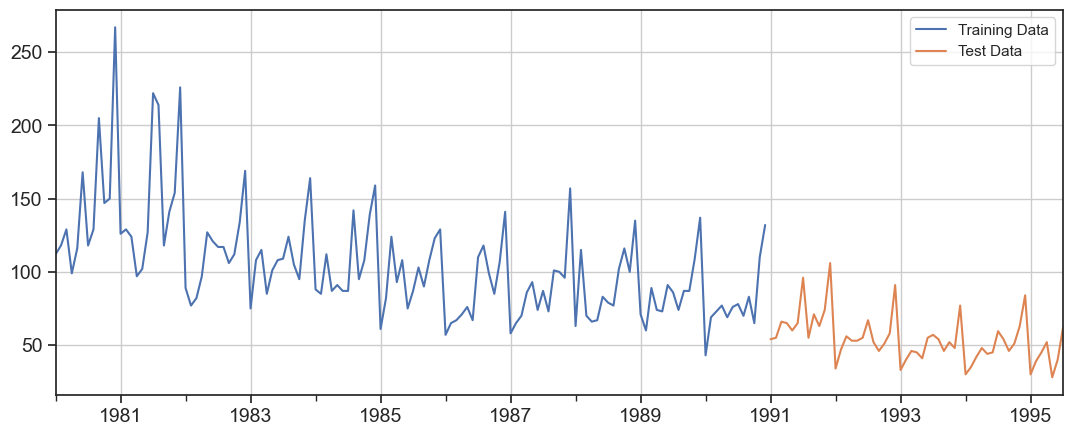

In [42]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [43]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [44]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [45]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

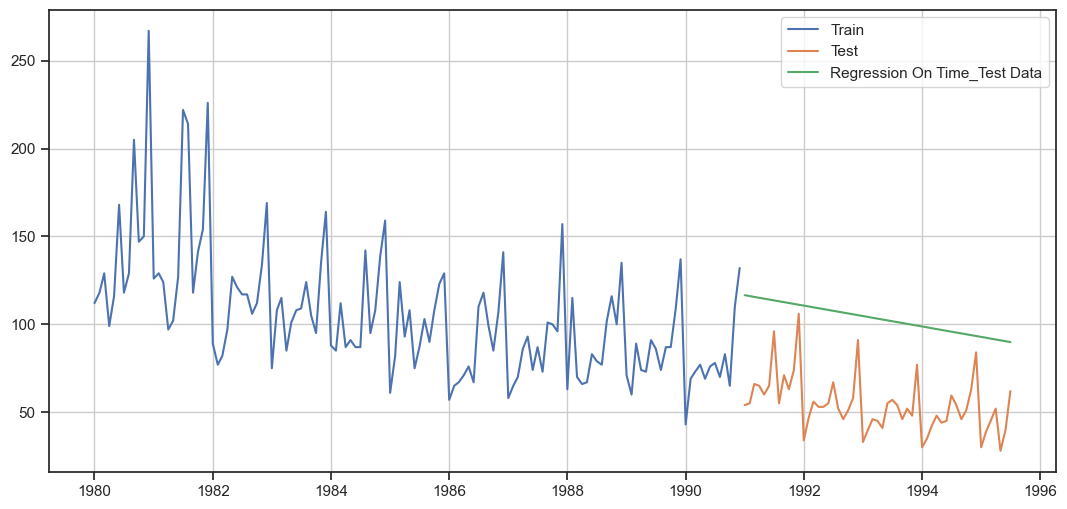

In [46]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [47]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,51.080941


In [48]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [49]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Freq: MS, Name: naive, dtype: float64

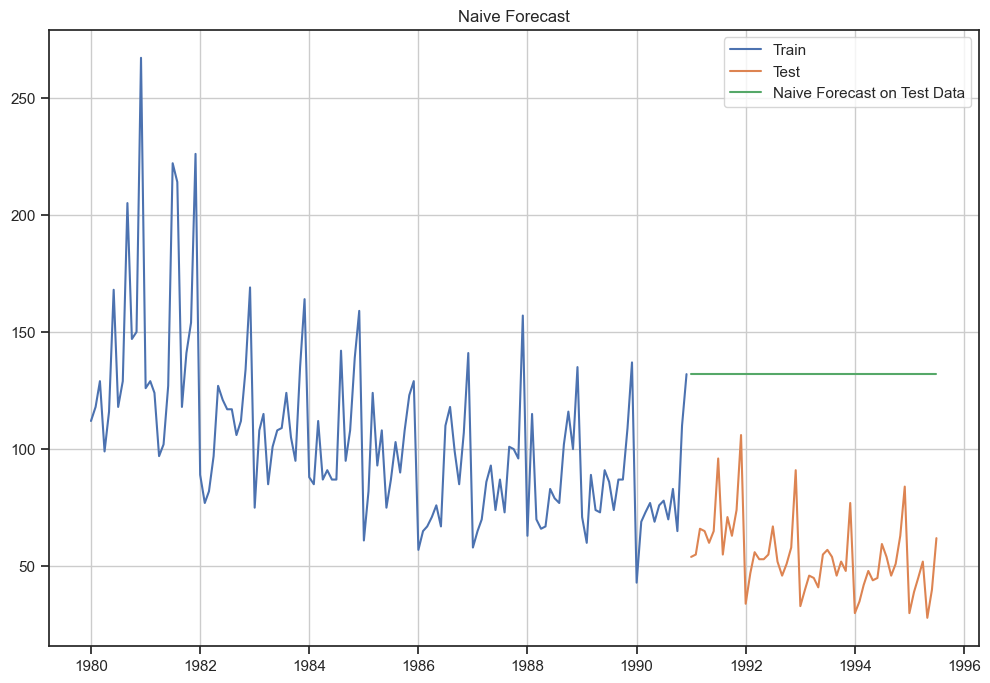

In [50]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [51]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391


In [52]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [53]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Year,Month,Sales,mean_forecast
1991-01-01,1991,1,54.0,104.939394
1991-02-01,1991,2,55.0,104.939394
1991-03-01,1991,3,66.0,104.939394
1991-04-01,1991,4,65.0,104.939394
1991-05-01,1991,5,60.0,104.939394


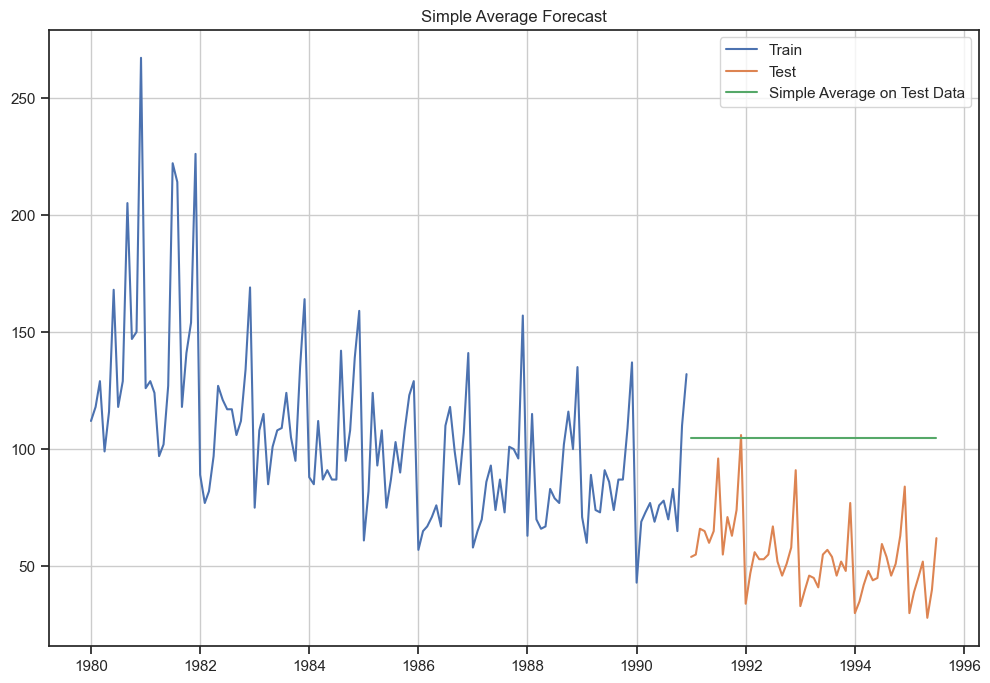

In [54]:

plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [55]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755


In [56]:
MovingAverage = df.copy()
MovingAverage.head()

,Year,Month,Sales
1980-01-01,1980,1,112.0
1980-02-01,1980,2,118.0
1980-03-01,1980,3,129.0
1980-04-01,1980,4,99.0
1980-05-01,1980,5,116.0


In [57]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Year,Month,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
1980-01-01,1980,1,112.0,NaN,NaN,NaN,NaN
1980-02-01,1980,2,118.0,115.0,NaN,NaN,NaN
1980-03-01,1980,3,129.0,123.5,NaN,NaN,NaN
1980-04-01,1980,4,99.0,114.0,114.5,NaN,NaN
1980-05-01,1980,5,116.0,107.5,115.5,NaN,NaN


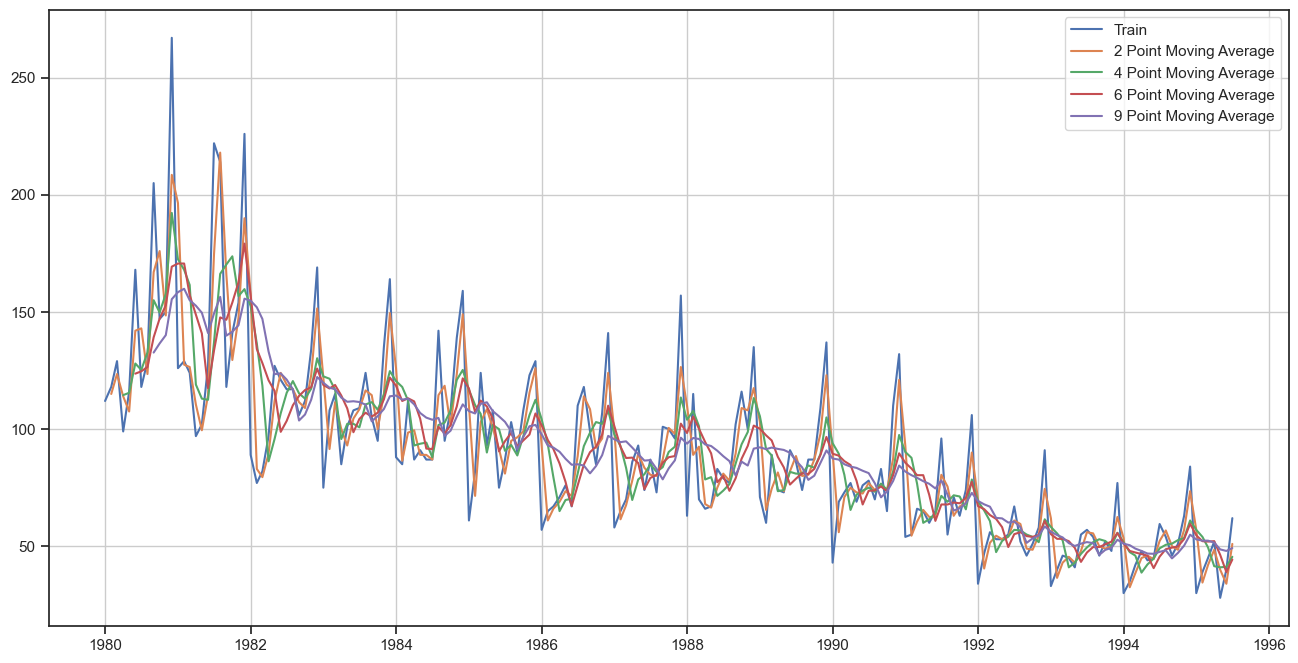

In [58]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [59]:

#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


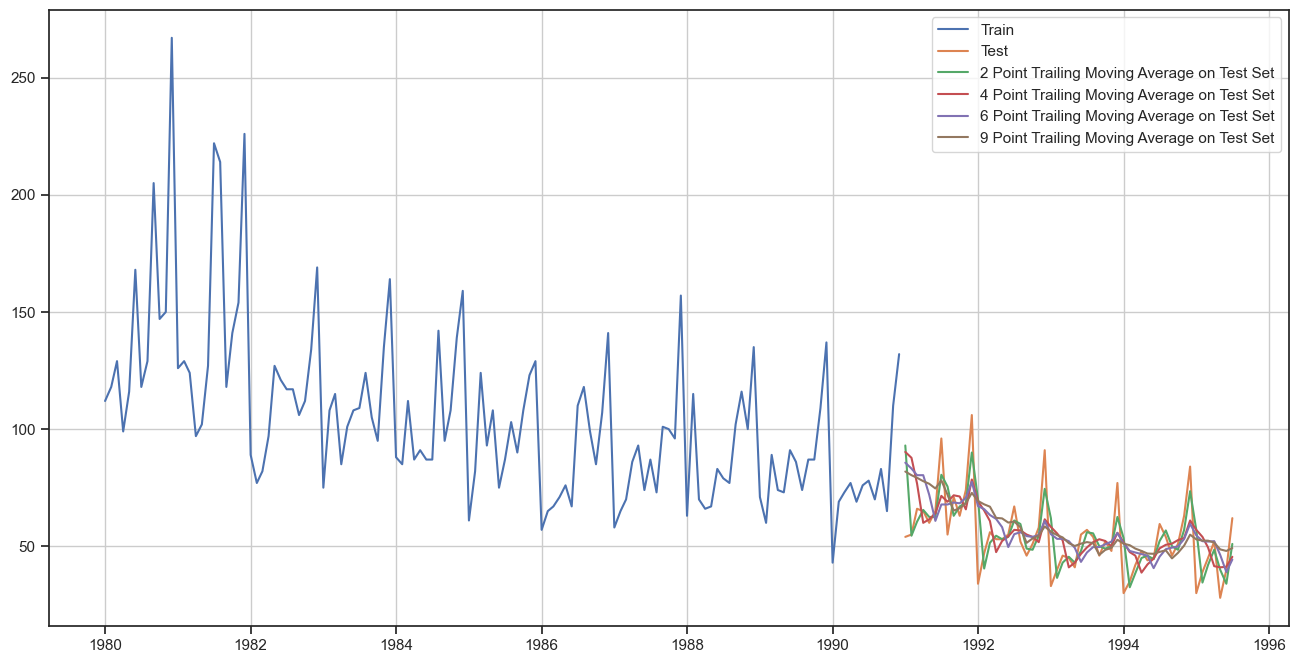

In [60]:

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [61]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [62]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139


In [63]:
SES_train = train.copy()
SES_test = test.copy()

In [64]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [65]:
model_SES_autofit = model_SES.fit(optimized=True)

In [66]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [68]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Year,Month,Sales,predict
1991-01-01,1991,1,54.0,87.983765
1991-02-01,1991,2,55.0,87.983765
1991-03-01,1991,3,66.0,87.983765
1991-04-01,1991,4,65.0,87.983765
1991-05-01,1991,5,60.0,87.983765


In [69]:

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
#     resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
#                                       ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
    resultsDf_temp.loc[len(resultsDf_temp)]={'Alpha Values': i, 'Train RMSE':rmse_model5_train_i,'Test RMSE':rmse_model5_test_i }

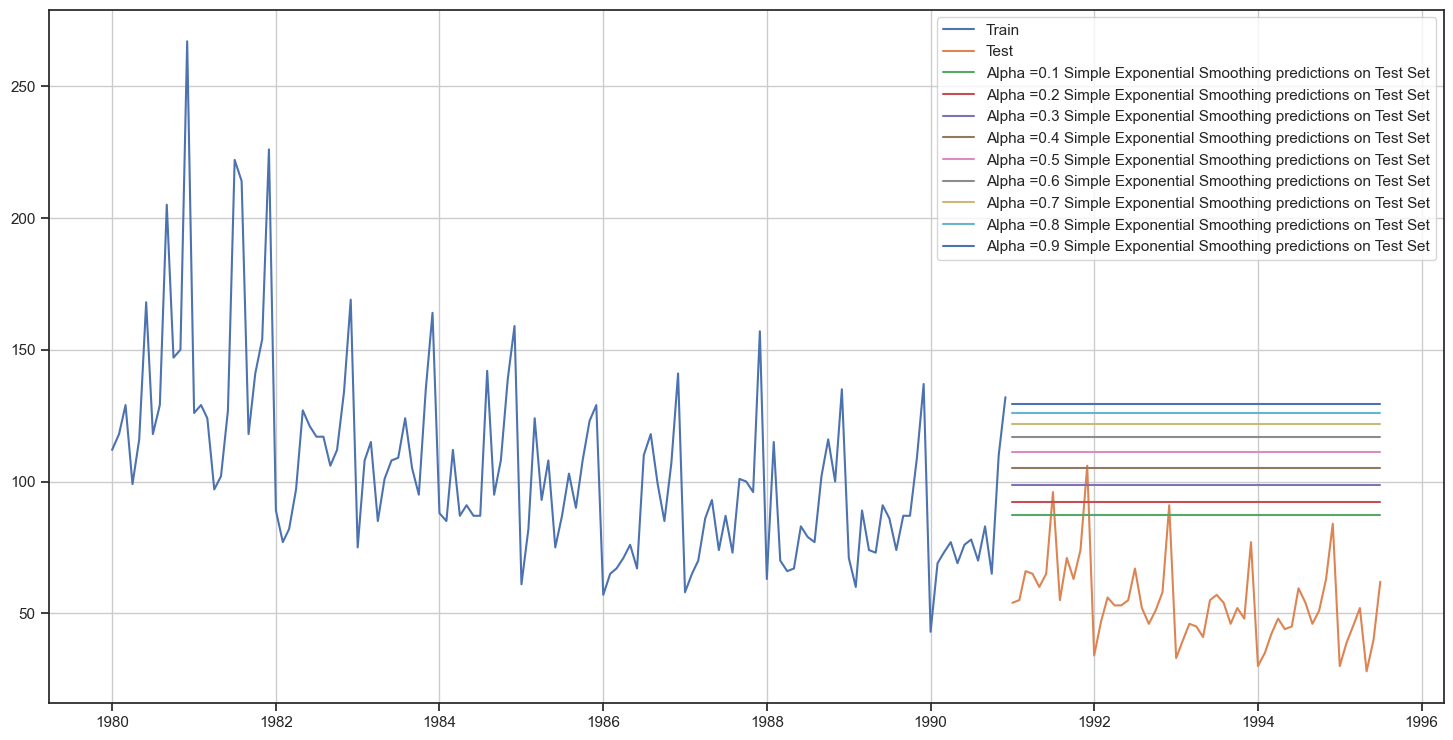

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [71]:

resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,31.815610,36.429535
1,0.2,31.979391,40.957988
2,0.3,32.470164,47.096522
3,0.4,33.035130,53.356493
4,0.5,33.682839,59.229384
5,0.6,34.441171,64.558022
6,0.7,35.323261,69.284383
7,0.8,36.334596,73.359904
8,0.9,37.482782,76.725002


In [72]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535


In [73]:
DES_train = train.copy()
DES_test = test.copy()

In [74]:
model_DES = Holt(DES_train['Sales'])

In [75]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213321015010723,
 'smoothing_trend': 0.13152155372234675,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Year,Month,Sales,predict
1991-01-01,1991,1,54.0,87.249993
1991-02-01,1991,2,55.0,88.152722
1991-03-01,1991,3,66.0,89.055451
1991-04-01,1991,4,65.0,89.958180
1991-05-01,1991,5,60.0,90.860910


In [77]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [78]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.193


In [79]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
#         resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
#                                           ,'Test RMSE':rmse_model6_test}, ignore_index=True)
        resultsDf_6.loc[len(resultsDf_6)]={'Alpha Values': i, 'Beta Values':j, 'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test }

resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
2,0.1,0.3,33.145789,77.649847
3,0.1,0.4,33.262191,99.064536
4,0.1,0.5,33.688415,123.742433
...,...,...,...,...
95,1.0,0.6,51.831610,801.137173
96,1.0,0.7,54.497039,841.349112
97,1.0,0.8,57.365879,853.421959
98,1.0,0.9,60.474309,834.167545


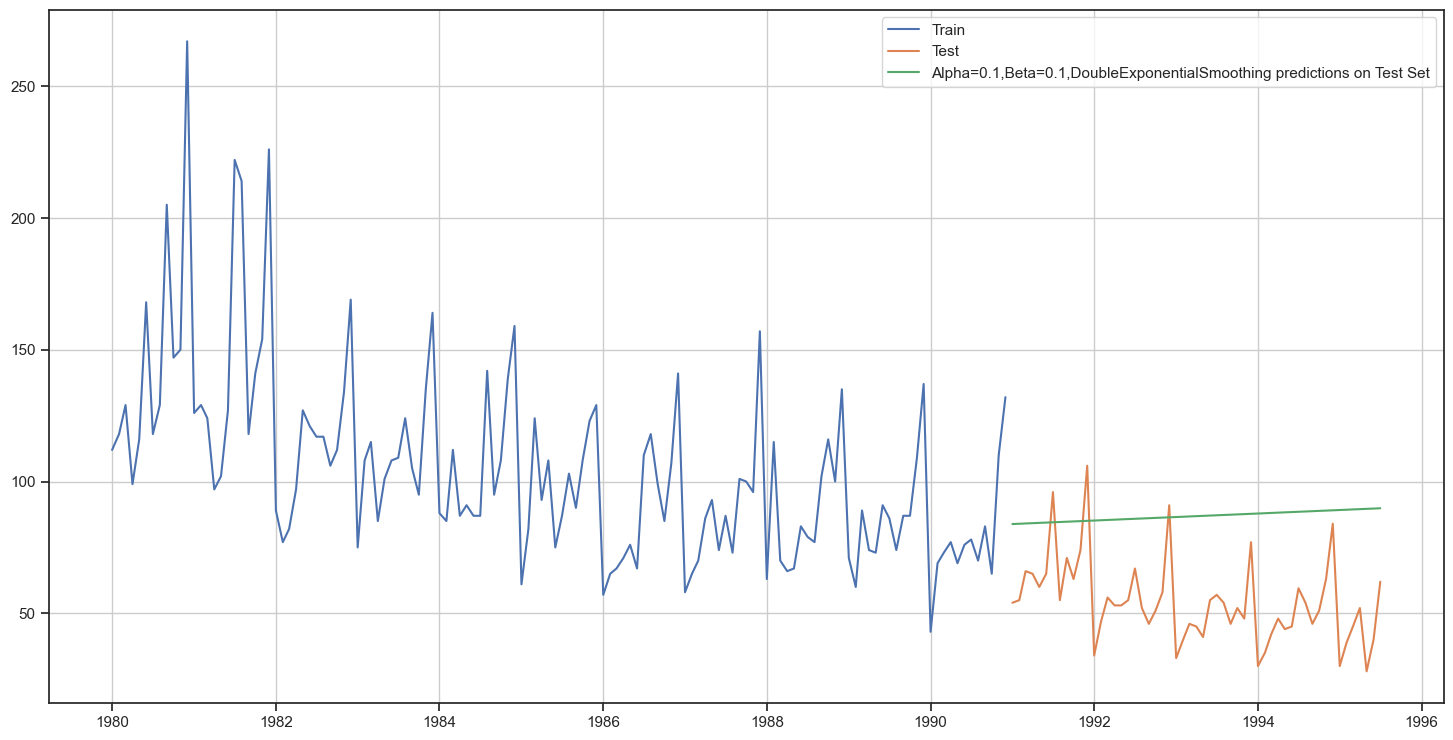

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [81]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.510010
1,0.1,0.2,33.450729,48.221436
10,0.2,0.1,33.097427,65.251675
2,0.1,0.3,33.145789,77.649847
20,0.3,0.1,33.611269,98.152852


In [82]:

resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010


In [83]:
TES_train = train.copy()
TES_test = test.copy()

In [84]:

model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [85]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [86]:

model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [87]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [88]:

model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [89]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.053527754869099636,
 'smoothing_trend': 0.03326784064001227,
 'smoothing_seasonal': 1.1369165069859105e-05,
 'damping_trend': nan,
 'initial_level': 114.21180446123547,
 'initial_trend': 0.9923631726352484,
 'initial_seasons': array([0.99382377, 1.12786066, 1.23494689, 1.07812886, 1.21324338,
        1.31945262, 1.44982009, 1.54564845, 1.4653871 , 1.43209206,
        1.67215844, 2.30190104]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:

model_TES_autofit_tm_sa.params

{'smoothing_level': 0.14642857142857144,
 'smoothing_trend': 0.05324675324675325,
 'smoothing_seasonal': 0.13131868131868132,
 'damping_trend': nan,
 'initial_level': 145.27499999999992,
 'initial_trend': 1.0052617032482805,
 'initial_seasons': array([-30.484375  , -25.046875  , -15.53645833, -30.734375  ,
        -16.46354167,  -9.72395833,  12.44270833,  17.53645833,
          5.55729167,  -3.890625  ,  15.99479167,  80.34895833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [92]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa
1991-01-01,1991,1,54.0,42.574560
1991-02-01,1991,2,55.0,54.372099
1991-03-01,1991,3,66.0,61.821511
1991-04-01,1991,4,65.0,50.671639
1991-05-01,1991,5,60.0,58.932400


In [93]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm
1991-01-01,1991,1,54.0,42.574560,55.942246
1991-02-01,1991,2,55.0,54.372099,63.240624
1991-03-01,1991,3,66.0,61.821511,68.899674
1991-04-01,1991,4,65.0,50.671639,60.007486
1991-05-01,1991,5,60.0,58.932400,67.257150


In [94]:

TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm
1991-01-01,1991,1,54.0,42.574560,55.942246,55.753580
1991-02-01,1991,2,55.0,54.372099,63.240624,63.084055
1991-03-01,1991,3,66.0,61.821511,68.899674,68.866825
1991-04-01,1991,4,65.0,50.671639,60.007486,59.942156
1991-05-01,1991,5,60.0,58.932400,67.257150,67.252072


In [95]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Year,Month,Sales,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
1991-01-01,1991,1,54.0,42.574560,55.942246,55.753580,46.284930
1991-02-01,1991,2,55.0,54.372099,63.240624,63.084055,58.354810
1991-03-01,1991,3,66.0,61.821511,68.899674,68.866825,64.361205
1991-04-01,1991,4,65.0,50.671639,60.007486,59.942156,54.433907
1991-05-01,1991,5,60.0,58.932400,67.257150,67.252072,60.002489


In [96]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.128
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 18.683
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.880
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.254


In [97]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623


In [98]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [99]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
#             resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
#                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
#                                                  , ignore_index=True)
            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'ta_sa'  }

In [100]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
#             resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
#                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
#                                                  , ignore_index=True)
            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'ta_sm'  }

In [101]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
#             resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
#                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
#                                                  , ignore_index=True)
            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'tm_sm'  }

In [102]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
#             resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
#                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
#                                                  , ignore_index=True)
            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'tm_sa'  }

In [103]:
TES_test.head()

,Year,Month,Sales,"(predict_ta_sa, 0.1, 0.1, 0.1)","(predict_ta_sa, 0.1, 0.1, 0.2)","(predict_ta_sa, 0.1, 0.1, 0.30000000000000004)","(predict_ta_sa, 0.1, 0.1, 0.4)","(predict_ta_sa, 0.1, 0.1, 0.5)","(predict_ta_sa, 0.1, 0.1, 0.6)","(predict_ta_sa, 0.1, 0.1, 0.7000000000000001)",...,"(predict_tm_sa, 0.9, 0.8, 0.9)","(predict_tm_sa, 0.9, 0.9, 0.1)","(predict_tm_sa, 0.9, 0.9, 0.2)","(predict_tm_sa, 0.9, 0.9, 0.30000000000000004)","(predict_tm_sa, 0.9, 0.9, 0.4)","(predict_tm_sa, 0.9, 0.9, 0.5)","(predict_tm_sa, 0.9, 0.9, 0.6)","(predict_tm_sa, 0.9, 0.9, 0.7000000000000001)","(predict_tm_sa, 0.9, 0.9, 0.8)","(predict_tm_sa, 0.9, 0.9, 0.9)"
1991-01-01,1991,1,54.0,45.711834,46.537302,46.559436,46.071952,45.225493,44.012323,42.371394,...,3.735952e+33,49.121533,76.518424,376.731488,4895.861548,5.809412e+04,1.638740e+05,-5.749099e+08,-1.981676e+12,9.552794e+39
1991-02-01,1991,2,55.0,56.369270,60.659980,62.645947,63.356292,63.447907,63.255359,62.959944,...,7.148786e+32,37.090349,76.114781,509.316662,16304.896188,6.511844e+05,2.092803e+07,-2.812972e+11,-1.592913e+17,7.303099e+38
1991-03-01,1991,3,66.0,63.004762,65.794341,66.979401,67.649481,68.330584,69.025477,69.443834,...,1.357303e+32,15.196663,47.008485,593.068850,47658.505261,5.673444e+06,8.764094e+08,-2.321151e+11,-4.477184e+20,5.583209e+37
1991-04-01,1991,4,65.0,51.663022,58.369250,62.190538,64.397061,65.989684,67.481555,68.978770,...,2.576482e+31,-2.515265,9.602428,669.057836,138695.857310,4.866318e+07,2.483195e+10,1.937298e+15,-8.742387e+22,4.268341e+36
1991-05-01,1991,5,60.0,58.931424,61.246579,62.077338,62.127541,62.025325,62.111373,62.439476,...,-1.230813e+29,-1.476818,-5.631953,759.079023,403820.871296,4.173403e+08,6.957411e+11,4.618220e+17,-2.928919e+24,-3.966771e+36


In [104]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
2136,0.2,0.7,0.2,24.042290,8.992350,tm_sm
1010,0.1,0.2,0.1,19.770392,9.221020,ta_sm
1011,0.1,0.2,0.2,20.253487,9.543696,ta_sm
1151,0.2,0.6,0.2,23.129850,9.922552,ta_sm
1012,0.1,0.2,0.3,20.871304,9.952909,ta_sm


In [105]:

resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623


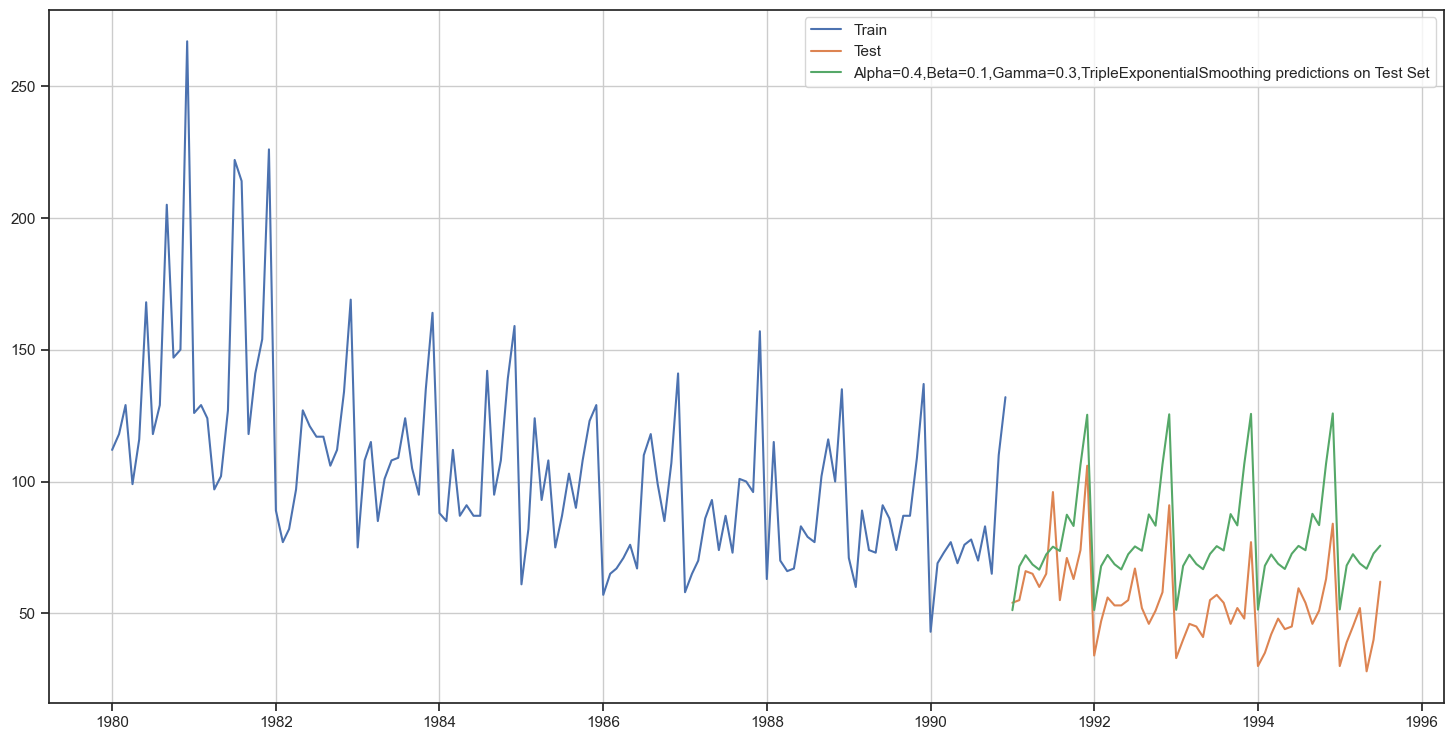

In [106]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [107]:
from statsmodels.tsa.stattools import adfuller

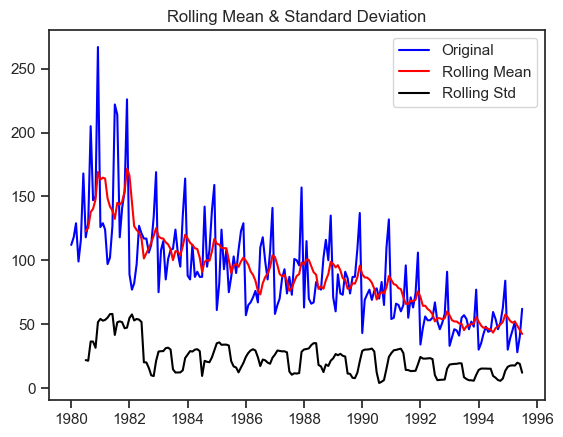

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [108]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

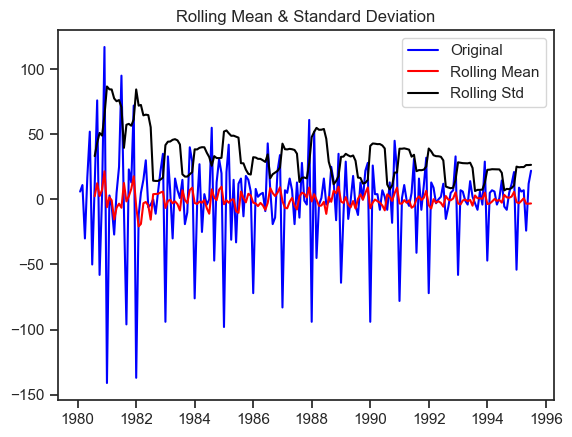

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [109]:
test_stationarity(df['Sales'].diff().dropna())

In [110]:

import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [111]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [112]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC.loc[len(ARIMA_AIC)]={'param': param, 'AIC':ARIMA_model.aic}
    #ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748306
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(0, 1, 3) - AIC:1280.545376173465
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(1, 1, 3) - AIC:1281.870722330997
ARIMA(2, 1, 0) - AIC:1298.6110341604885
ARIMA(2, 1, 1) - AIC:1281.5078621868493
ARIMA(2, 1, 2) - AIC:1281.8707222264616


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.694964030832
ARIMA(3, 1, 0) - AIC:1297.4810917271648
ARIMA(3, 1, 1) - AIC:1282.4192776271925
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.6684165891343


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [113]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1274.694964
15,"(3, 1, 3)",1278.668417
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
5,"(1, 1, 1)",1280.574230
9,"(2, 1, 1)",1281.507862
10,"(2, 1, 2)",1281.870722
7,"(1, 1, 3)",1281.870722
1,"(0, 1, 1)",1282.309832


In [114]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 27 Aug 2023   AIC                           1274.695
Time:                        09:08:46   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.037      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.704      0.000      -0.893      -0.565
ma.L1          1.0449      0.674      1.550      0.1

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.420802838383274


In [116]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623


In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [118]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [119]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        #SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        SARIMA_AIC.loc[len(SARIMA_AIC)]={'param': param, 'seasonal':param_seasonal ,'AIC':results_SARIMA.aic}

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207496
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4104.725479403874
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386934
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635757157


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3444.220705295015
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945548


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3376.0759977940857
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931096
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270268172
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128037


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3339.393424525074
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383781


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4004.5536219667933
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918726
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094653
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483309015


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3992.2049649956725
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535977
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461671
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988332608636


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3519.173158786462
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976482471
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844933198883
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269431298


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3537.0583033721787
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264902
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617701


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2929.0158583144052
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341428
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933537248
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913519929


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2199.373833380459
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257989
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545017539
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679048


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2739.5586585787664
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189374633
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.994108053457
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528446236


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2316.9136662713554
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739197
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646079348
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380722


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3963.507868153348
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212243
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.841121293602
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523339557


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3899.30585638883
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987087
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996894972
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.550978825276


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3444.632074125995
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124794233
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772292301
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150751804451


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3523.4062831901756
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585712
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257685


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3833.252061204556
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680456
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055028583
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948446


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3826.048098731393
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778663985
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661062
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071271


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3342.97503204544
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272644
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573517
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086848351


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3369.0826728248576
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255516
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640693
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.086222406387
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4110.16639199634
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031882
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547134424
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428502216
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:4097.805475265854
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060839602
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470748
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936867
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3624.7960312238088
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439388664
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447821738
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850254001
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3642.641518967129
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.949504070617
SARIMA(1, 1, 2)x(0, 0, 1

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3992.739619333038
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760922460045
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211180821
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500273143


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3980.7134705519466
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196871572
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597832397307
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.871767096859


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3513.8390247369807
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801424245
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.631280828586
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390246348698


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3531.5353670268287
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.546312531635
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849738788796
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105082153


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3903.4085508393614
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487675945
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950931276901
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.523229150766


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3897.5719300711653
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687615029326
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955660043883
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886592303948


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3435.472515801865
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903140234221
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310145923364
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467988337282


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3448.9296250009374
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704710917
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829954
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4152.341405069705
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575896
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641219
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558919


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4140.450666710207
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645423
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384026
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280784
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3663.160746023325
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407408426
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903351
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191371712


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3885.6842891660503
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231807388
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949465
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472081028


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3724.0824867943666
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101387
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.924447120115
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822668


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3889.864690589285
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608085852
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369253
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866284229


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3527.3097798417793
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600230653
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258878978
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887544788


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3128.0671031930538
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614672
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259819
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311107787


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3774.439331498565
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.291271369884
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909353603462
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488810623


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3680.2636175736075
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464442416216
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889582419
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687983583386


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:2659.261748075347
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712704938
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035519257
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640485777093


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3251.5503780204886
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8701982791947
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073334597043
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349315276428


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:4013.354608790238
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.256323027381
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461969624655
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483347087781


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:4001.4198028162596
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301563593
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328066863553
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191798467898


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3535.309329740249
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208069534
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101487182015
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452491004118


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3541.4963695824945
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042226
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.344058911805
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4156.232697286599
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726312
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726785427
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304662
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:4143.717362092269
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197997601
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976484
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472862
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3665.6002895635334
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.056470152727
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167660955
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017283602


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3509.9273127808583
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.06581807093
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.689464121797
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547501


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3726.082495299609
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.614913651118
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.083755403237
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384312


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3891.8646905892806
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459897684
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208538039
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523240932
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2912.465183834245
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990215858
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300786103
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002851308297


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3758.543312254153
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835653020318
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092402980682
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.798011168389
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:4089.3917508414143
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.277621128127
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260523738463
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875098138077
SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4082.12448330018
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3185482610113
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441238606
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1436460466123
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3808.2477586902555
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505642058343
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462134388919
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809381961603


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3820.3733353560474
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385894684528
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.539795452678
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340146804877


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3804.3072489690053


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.845882730332
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380784554
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483659593306


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3563.1566109642717
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711770645
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217117143639
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595622039434


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3507.7346679989537
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184824989
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690405240433
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316184590644


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3520.9810833896686


In [120]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400285
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880938
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


In [121]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 27 Aug 2023   AIC                            774.400
Time:                                         09:21:56   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

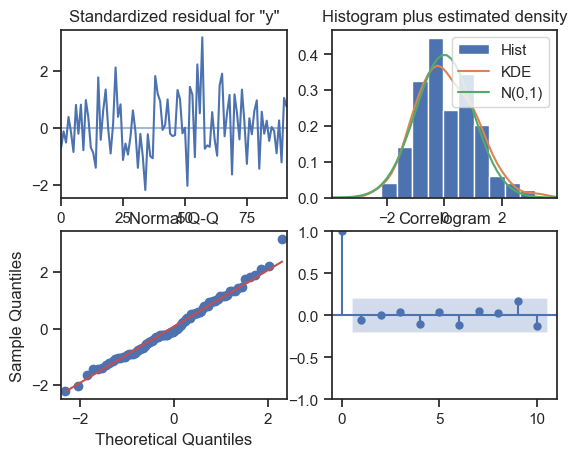

In [122]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [123]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,55.235174,13.907774,27.976438,82.493910
1,68.123023,13.991218,40.700741,95.545306
2,67.908688,14.012269,40.445146,95.372230
3,66.786177,14.099576,39.151515,94.420839
4,69.760082,14.108935,42.107076,97.413087


In [124]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.535529173023708


In [125]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623


In [126]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

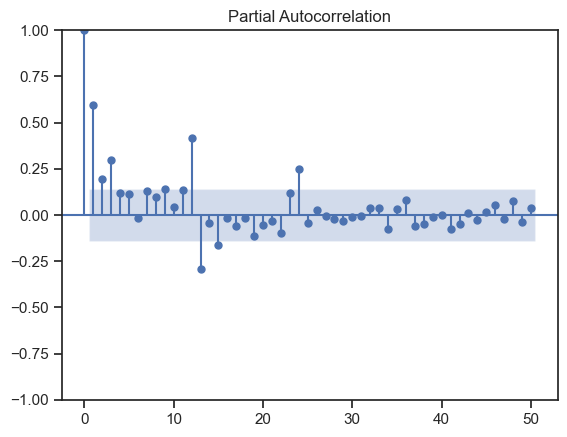

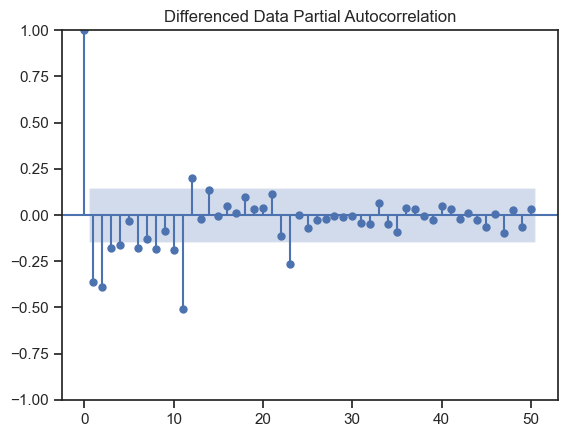

In [127]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

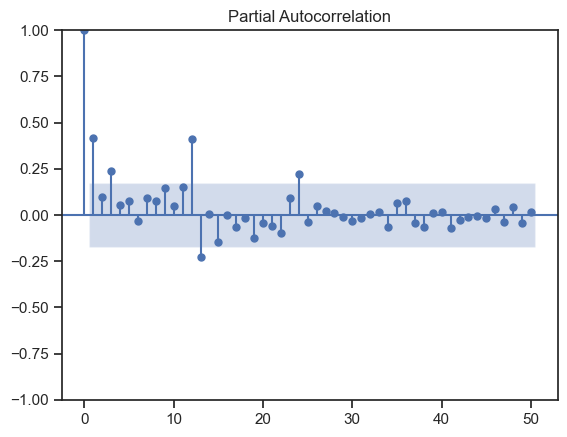

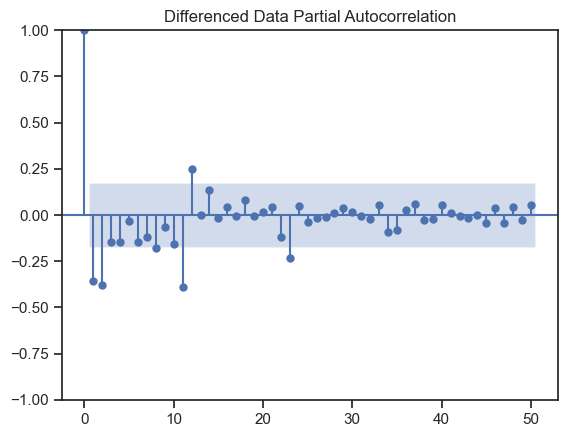

In [128]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [129]:
manual_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 27 Aug 2023   AIC                           1281.871
Time:                        09:22:00   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

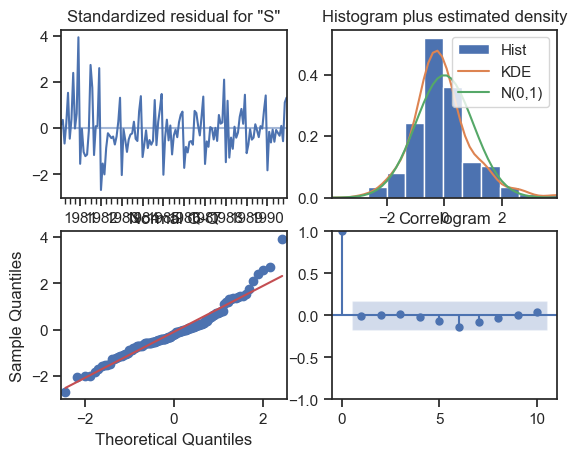

In [130]:
results_manual_ARIMA.plot_diagnostics();

In [131]:

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.473224879613475


In [132]:

temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623


In [133]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [134]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.016
Date:                            Sun, 27 Aug 2023   AIC                           1094.031
Time:                                    09:22:08   BIC                           1119.044
Sample:                                         0   HQIC                          1104.188
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5491      0.228     -2.408      0.016      -0.996      -0.102
ar.L2         -0.0745      0.099   

In [135]:
SARIMA_AIC.loc[len(SARIMA_AIC)]={'param': param, 'seasonal':param_seasonal ,'AIC':results_manual_SARIMA.aic}
SARIMA_AIC

,param,seasonal,AIC
0,"(3, 1, 3)","(3, 0, 3, 12)",1094.031391


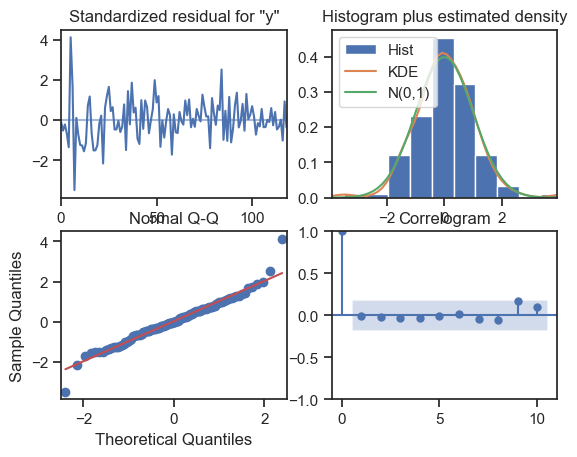

In [136]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [137]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,38.860547,21.079473,-2.454460,80.175554
1,65.277071,21.893156,22.367274,108.186868
2,60.207009,21.939130,17.207103,103.206914
3,59.296694,22.253604,15.680432,102.912957
4,60.594343,22.299947,16.887250,104.301437


In [138]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

14.974943476148228


In [139]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
Linear Regression,51.080941
Naive Model,79.304391
Simple Average Model,53.049755
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",36.510010
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",37.192623


In [140]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing",8.992350
2pointTrailingMovingAverage,11.589082
4pointTrailingMovingAverage,14.506190
6pointTrailingMovingAverage,14.558008
9pointTrailingMovingAverage,14.797139
"(2,1,2)(2,1,2,12),Manual_SARIMA",14.974943
"(3,1,1),(3,0,2,12),Auto_SARIMA",18.535529
Auto_ARIMA,36.420803
"Alpha=0.1,SimpleExponentialSmoothing",36.429535
"ARIMA(3,1,3)",36.473225


In [141]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [142]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [143]:
TES_train = df.copy()

In [144]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [145]:
future_predictions['Sales_Predictions']=prediction
future_predictions

,Sales_Predictions
1995-08-01,36.096841
1995-09-01,34.999961
1995-10-01,36.289937
1995-11-01,43.126839
1995-12-01,61.593978
1996-01-01,24.293852
1996-02-01,31.406019
1996-03-01,37.545514
1996-04-01,39.735393
1996-05-01,33.753457


In [146]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,-6.382843,36.096841,78.576525
1995-09-01,-7.479723,34.999961,77.479645
1995-10-01,-6.189747,36.289937,78.769621
1995-11-01,0.647155,43.126839,85.606523
1995-12-01,19.114294,61.593978,104.073662


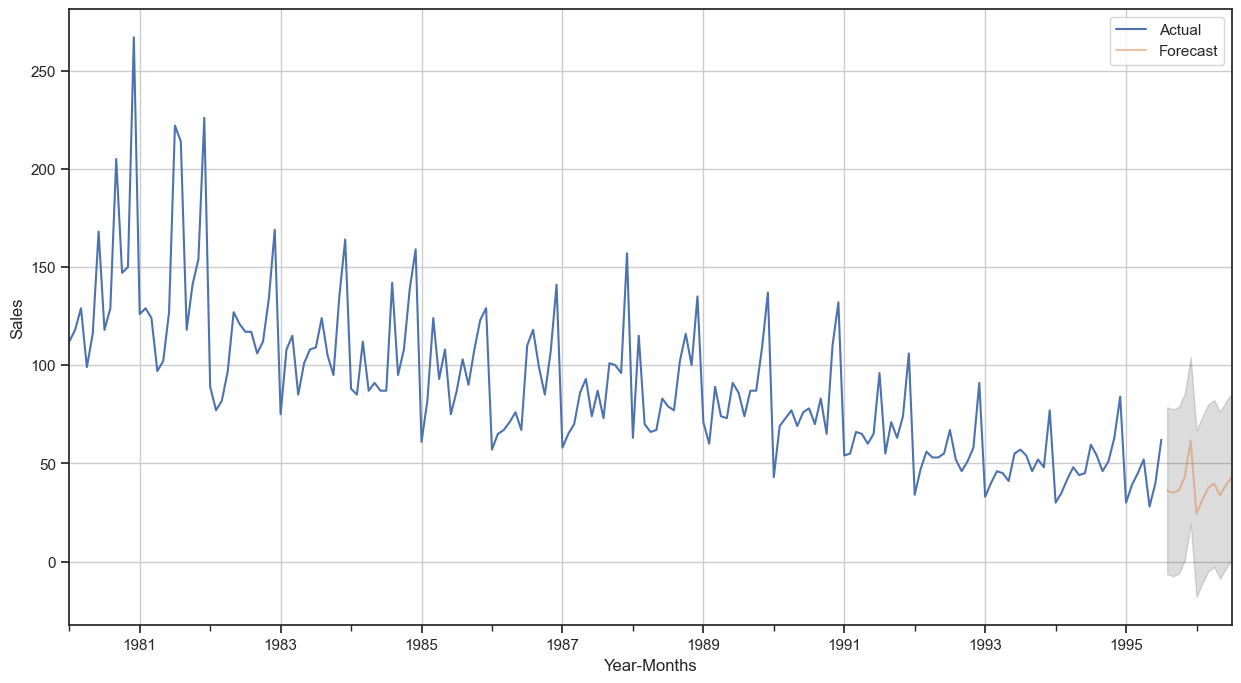

In [147]:

# plot the forecast along with the confidence band

axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()